In [1]:
from google.colab import files
uploaded = files.upload()

Saving freemium_users_dataset.csv to freemium_users_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("freemium_users_dataset.csv")
df.head()

,user_id,signup_date,device,country,sessions,feature_A_used,feature_B_used,support_tickets,converted_to_paid,conversion_date
0,1,2023-04-13,Mobile,Nigeria,9,1,1,0,1,2023-06-04
1,2,2023-02-22,Desktop,Nigeria,9,1,0,0,0,NaN
2,3,2023-06-19,Desktop,Kenya,6,1,0,1,0,NaN
3,4,2023-02-20,Mobile,Nigeria,7,1,0,0,0,NaN
4,5,2023-04-02,Desktop,USA,6,1,1,0,0,NaN


In [3]:
print("shape:", df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDevice breakdown:")
print(df['device'].value_counts())

print("\nCountry breakdown:")
print(df['country'].value_counts())

print("\nConverted to paid breakdown:")
print(df['converted_to_paid'].value_counts())

shape: (10000, 10)

Data Types:
user_id               int64
signup_date          object
device               object
country              object
sessions              int64
feature_A_used        int64
feature_B_used        int64
support_tickets       int64
converted_to_paid     int64
conversion_date      object
dtype: object

Missing Values:
user_id                 0
signup_date             0
device                  0
country                 0
sessions                0
feature_A_used          0
feature_B_used          0
support_tickets         0
converted_to_paid       0
conversion_date      9480
dtype: int64

Device breakdown:
device
Mobile     6518
Desktop    3482
Name: count, dtype: int64

Country breakdown:
country
Nigeria    2974
Kenya      2027
USA        2010
Germany    1982
India      1007
Name: count, dtype: int64

Converted to paid breakdown:
converted_to_paid
0    9480
1     520
Name: count, dtype: int64


In [4]:
#Convert signup_date and conversion_date
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['conversion_date'] = pd.to_datetime(df['conversion_date'])

#create days to convert
df['days_to_convert'] = (df['conversion_date'] - df['signup_date']).dt.days

#Visual EDA: Conversion Patterns
>Let’s explore what factors are associated with conversion using grouped summaries and plots.

###Conversion Rate by Country

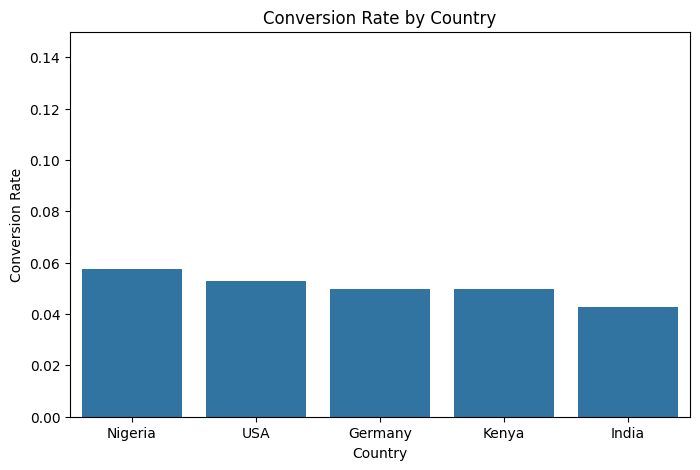

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Group by country
country_conversion = df.groupby('country')['converted_to_paid'].mean().sort_values(ascending=False)

#Create bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=country_conversion.index, y=country_conversion.values)
plt.title("Conversion Rate by Country")
plt.ylabel("Conversion Rate")
plt.xlabel("Country")
plt.ylim(0, 0.15)
plt.show()


###Conversion Rate by Device

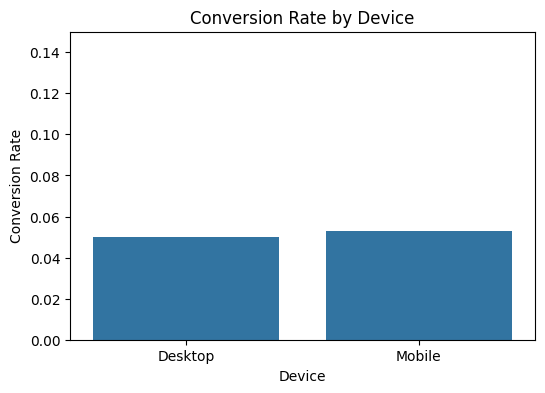

In [6]:
#Group by device
device_conversion = df.groupby('device')['converted_to_paid'].mean()

#Create bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=device_conversion.index, y=device_conversion.values)
plt.title("Conversion Rate by Device")
plt.ylabel("Conversion Rate")
plt.xlabel("Device")
plt.ylim(0, 0.15)
plt.show()

###Sessions Distribution (Converted vs Not)

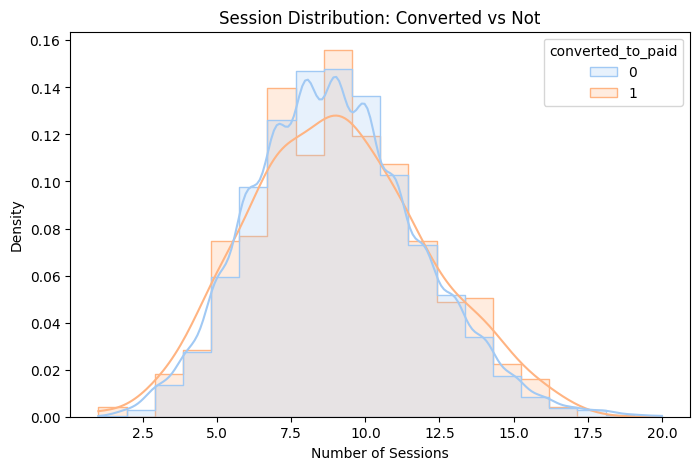

In [7]:
#Histogram of sessions by conversion status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='sessions', hue='converted_to_paid', bins=20, kde=True, palette="pastel", element="step", stat="density", common_norm=False)
plt.title("Session Distribution: Converted vs Not")
plt.xlabel("Number of Sessions")
plt.ylabel("Density")
plt.show()

#Feature Usage + Support Tickets EDA
>Let’s check if using core features or contacting support has impact on conversion.

###Conversion Rate by Feature A

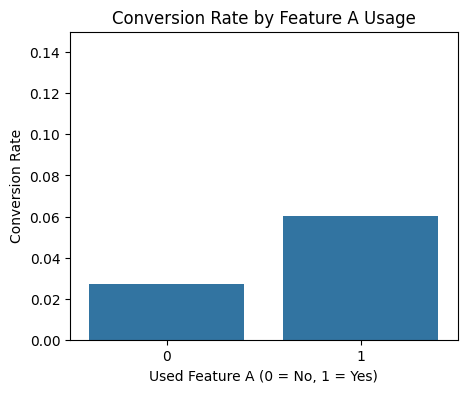

In [8]:
featureA_conversion = df.groupby('feature_A_used')['converted_to_paid'].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=featureA_conversion.index, y=featureA_conversion.values)
plt.title("Conversion Rate by Feature A Usage")
plt.ylabel("Conversion Rate")
plt.xlabel("Used Feature A (0 = No, 1 = Yes)")
plt.ylim(0, 0.15)
plt.show()

###Conversion Rate by Feature B

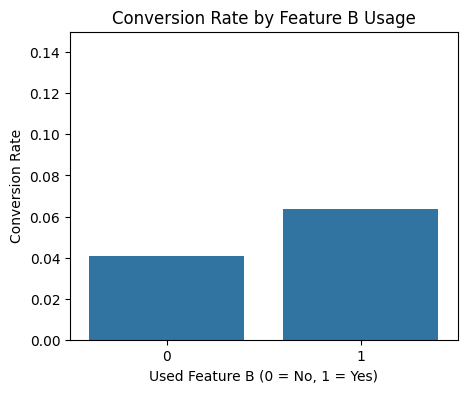

In [9]:
featureB_conversion = df.groupby('feature_B_used')['converted_to_paid'].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=featureB_conversion.index, y=featureB_conversion.values)
plt.title("Conversion Rate by Feature B Usage")
plt.ylabel("Conversion Rate")
plt.xlabel("Used Feature B (0 = No, 1 = Yes)")
plt.ylim(0, 0.15)
plt.show()

###Support Tickets vs Conversion

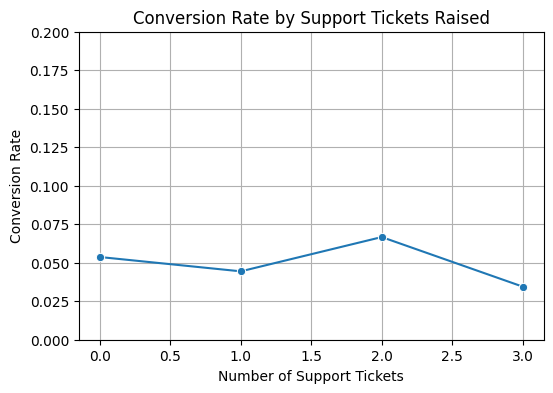

In [10]:
support_conversion = df.groupby('support_tickets')['converted_to_paid'].mean()

plt.figure(figsize=(6,4))
sns.lineplot(x=support_conversion.index, y=support_conversion.values, marker='o')
plt.title("Conversion Rate by Support Tickets Raised")
plt.ylabel("Conversion Rate")
plt.xlabel("Number of Support Tickets")
plt.ylim(0, 0.20)
plt.grid(True)
plt.show()

###Days to Convert — Distribution

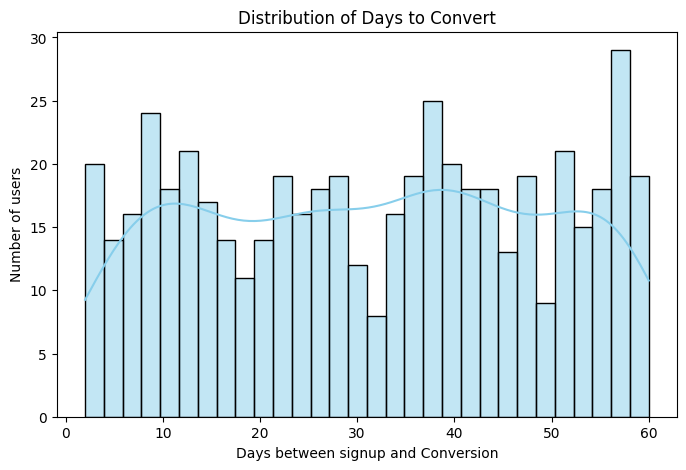

In [11]:
#Filter converted users only
converted = df[df['converted_to_paid'] == 1]

#Histogram of days to convert
plt.figure(figsize=(8,5))
sns.histplot(data=converted['days_to_convert'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Days to Convert")
plt.xlabel("Days between signup and Conversion")
plt.ylabel("Number of users")
plt.show()

###Correlation Heatmap (Numerical Variables)
>This gives a snapshot of how numeric features relate to `converted_to_paid`


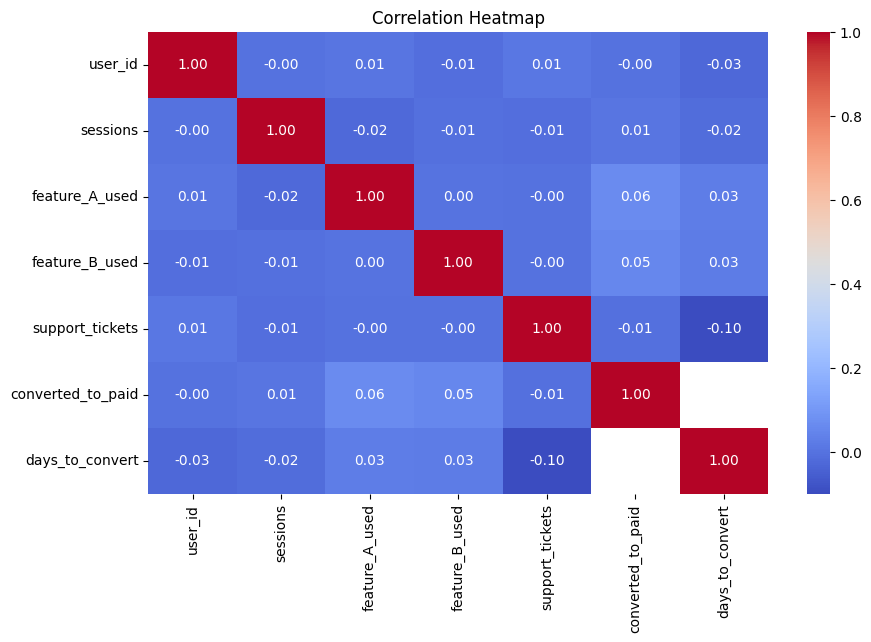

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()